<a href="https://colab.research.google.com/github/chettkulkarni/datasharing/blob/master/AV_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import re

!pip install nltk
!pip install gensim
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
liar=pd.read_csv('liar_with_stance.csv')
stop_words = set(stopwords.words('english')) 

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
liar['cleanedStatement'] = liar['statement'].map(lambda x: re.sub(r"\W", " ",str(x)))
liar['cleanedStatement'] = liar['cleanedStatement'].map(lambda x: re.sub(r'[,\.!?]', " ",str(x)))
liar['cleanedStatement'] = liar['cleanedStatement'].map(lambda x: re.sub(r" \d+", " ",str(x)))
liar['cleanedStatement'] = liar['cleanedStatement'].map(lambda x: word_tokenize(x.lower()))
liar['cleanedStatement'] = liar['cleanedStatement'].map(lambda x: ' '.join(x))
liar['cleanedStatement'] = liar['cleanedStatement'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# liar['cleanedStatement'] = liar['cleanedStatement'].apply(lambda x: tfidf(x))
liar['cleanedStatement'] = list(vectorizer.fit_transform(liar['cleanedStatement']).toarray())

In [0]:


le=LabelEncoder()

def tfidf(statement):
  vectorizer = TfidfVectorizer(stop_words='english')
  return vectorizer.fit_transform([statement]).to_array()


In [121]:
liar

,Unnamed: 0,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,similar_doc,Stance,cleanedStatement
0,0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,4438,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1928,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,4477,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,4051,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,4299,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",4179,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10236,10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,1782,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10237,10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,1084,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10238,10238,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,3647,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [0]:
def define_fake(item):
  false=['false','barely-true','pants-fire']
  if item in false:
    return 0
  return 1

In [0]:
liar['speaker_code']=le.fit_transform(liar['speaker'].astype(str))
liar['speaker_job_title_code']=le.fit_transform(liar['speaker_job_title'].astype(str))
liar['state info_code']=le.fit_transform(liar['state info'].astype(str))
liar['label_code']=liar['label'].apply(lambda x: define_fake(x))

In [0]:
liar_clean=liar[[
       'barely_true_counts', 'false_counts', 'half_true_counts',
       'mostly_true_counts', 'pants_on_fire_counts',
       'Stance', 'speaker_code', 'speaker_job_title_code', 'state info_code','label_code']]

In [171]:
liar_clean

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,Stance,speaker_code,speaker_job_title_code,state info_code,label_code
0,0.0,1.0,0.0,0.0,0.0,0,814,869,62,0
1,0.0,0.0,1.0,1.0,0.0,1,2492,867,69,1
2,70.0,71.0,160.0,163.0,9.0,0,182,642,19,1
3,7.0,19.0,3.0,5.0,44.0,1,272,1098,82,0
4,15.0,9.0,20.0,19.0,2.0,1,428,1098,13,1
...,...,...,...,...,...,...,...,...,...,...
10235,0.0,1.0,1.0,1.0,0.0,3,12,1098,13,1
10236,0.0,0.0,0.0,1.0,0.0,1,36,1098,15,1
10237,4.0,11.0,5.0,3.0,3.0,1,1108,1098,15,1
10238,3.0,1.0,3.0,0.0,0.0,1,1243,1098,13,0


In [0]:
from sklearn.metrics import plot_confusion_matrix
def fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test):
  accuracy={}
  specificity={}
  sensitivity={}
  model_save=None
  i=0
  #models_dict holds name and its function , like {'LR':LogsticRegression()}
  for name,model in models_dict.items():
      #fitting model on the train data
      model.fit(X_train,y_train)
      # joblib.dump(model, name+'.pkl')
      #predicting model on X_test 
      model_save=model
      y_pred=model.predict(X_test)
      print('*'*100)
      print('Model:',name)
      #printing Confusion matrix an dAccuracy of each model
      print("Confusion Matrix: ")
      print(confusion_matrix(y_test, y_pred))
      print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

      #mainitaing a dictionary of results of accuracy of each model to use it to plot in one systyem
      accuracy[name]=accuracy_score(y_test,y_pred)*100
      cm=confusion_matrix(y_test, y_pred)
      sensitivity[name] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
      specificity[name] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
      print("Classificarion Report : ")
      print(classification_report(y_test, y_pred))
      
  
  #converting dictionaries to dataframes to have them handy
  accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
  sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
  specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
  # print(accuracy)
  accuracy.columns=['model_name','accuracy']
  sensitivity.columns=['model_name','sensitivity']
  specificity.columns=['model_name','specificity']
  
  #plotting accuracy,sensitivity,specificity of each model
  plt.figure(i+1,figsize=(16, 6))
  ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
  ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
  ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
  ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
  plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')
  return model_save

In [0]:
liar_clean=liar_clean.fillna(0)
X=liar_clean.loc[:,liar_clean.columns!='label_code']
Y=liar_clean.loc[:,liar_clean.columns=='label_code']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
models_dict={}
# models_dict['LinearRegression']       = LinearRegression()
models_dict['LogisticRegression']     = LogisticRegression()
models_dict['Dtree']                  = DecisionTreeClassifier()
models_dict['NB']                     = GaussianNB()
models_dict['XGB']                    = XGBClassifier()
models_dict['RForest']                = RandomForestClassifier()
models_dict['SVM']                    = SVC(gamma='auto')
models_dict['KNN']                    = KNeighborsClassifier()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


****************************************************************************************************
Model: LogisticRegression
Confusion Matrix: 
[[ 554 2110]
 [ 287 3193]]
Accuracy :  60.986328125
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.66      0.21      0.32      2664
           1       0.60      0.92      0.73      3480

    accuracy                           0.61      6144
   macro avg       0.63      0.56      0.52      6144
weighted avg       0.63      0.61      0.55      6144

****************************************************************************************************
Model: Dtree
Confusion Matrix: 
[[1632 1032]
 [1049 2431]]
Accuracy :  66.12955729166666
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2664
           1       0.70      0.70      0.70      3480

    accuracy                           0.66      6144
   macro avg     

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****************************************************************************************************
Model: XGB
Confusion Matrix: 
[[1659 1005]
 [ 738 2742]]
Accuracy :  71.630859375
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.69      0.62      0.66      2664
           1       0.73      0.79      0.76      3480

    accuracy                           0.72      6144
   macro avg       0.71      0.71      0.71      6144
weighted avg       0.71      0.72      0.71      6144



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


****************************************************************************************************
Model: RForest
Confusion Matrix: 
[[1606 1058]
 [ 906 2574]]
Accuracy :  68.03385416666666
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      2664
           1       0.71      0.74      0.72      3480

    accuracy                           0.68      6144
   macro avg       0.67      0.67      0.67      6144
weighted avg       0.68      0.68      0.68      6144



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****************************************************************************************************
Model: SVM
Confusion Matrix: 
[[ 913 1751]
 [ 742 2738]]
Accuracy :  59.423828125
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.55      0.34      0.42      2664
           1       0.61      0.79      0.69      3480

    accuracy                           0.59      6144
   macro avg       0.58      0.56      0.55      6144
weighted avg       0.58      0.59      0.57      6144



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


****************************************************************************************************
Model: KNN
Confusion Matrix: 
[[1267 1397]
 [1197 2283]]
Accuracy :  57.779947916666664
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.51      0.48      0.49      2664
           1       0.62      0.66      0.64      3480

    accuracy                           0.58      6144
   macro avg       0.57      0.57      0.57      6144
weighted avg       0.57      0.58      0.58      6144



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

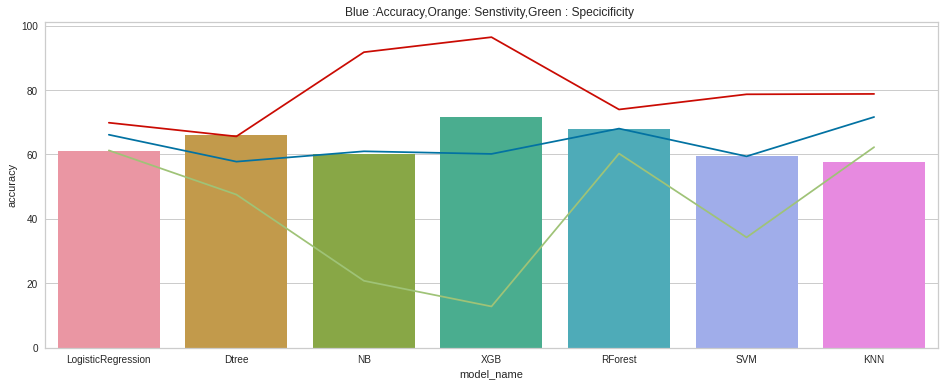

In [176]:
fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test)

In [130]:
X_train

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,Stance,speaker_code,speaker_job_title_code,state info_code
6316,0.0,0.0,1.0,1.0,0.0,0,1349,223,51
4332,0.0,0.0,0.0,1.0,0.0,3,791,924,15
8927,2.0,4.0,1.0,2.0,1.0,1,1776,252,79
8957,31.0,39.0,31.0,37.0,8.0,1,1416,949,2
7860,0.0,4.0,2.0,8.0,0.0,1,571,949,39
...,...,...,...,...,...,...,...,...,...
2895,11.0,8.0,5.0,1.0,9.0,1,718,1098,82
7813,15.0,9.0,20.0,19.0,2.0,0,428,1098,13
905,70.0,71.0,160.0,163.0,9.0,1,182,642,19
5192,34.0,32.0,58.0,33.0,19.0,1,1952,362,28


In [147]:
liar.label.unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [0]:
# liar - stance